In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/Premalatha-success/Supervised-Learning/main/auto-mpg.csv')

In [3]:
df.sample

<bound method NDFrame.sample of       mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0        130    3504          12.0   
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1        

In [4]:
df.drop('car name',axis=1,inplace=True)

In [5]:
df['origin']=df['origin'].replace({1:'america',2:'europe',3:'asia'})
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
191,22.0,6,225.0,100,3233,15.4,76,america
254,20.2,6,200.0,85,2965,15.8,78,america
220,33.5,4,85.0,70,1945,16.8,77,asia
96,13.0,8,360.0,175,3821,11.0,73,america
320,37.0,4,119.0,92,2434,15.0,80,asia
146,28.0,4,90.0,75,2125,14.5,74,america
245,36.1,4,98.0,66,1800,14.4,78,america
87,13.0,8,350.0,145,3988,13.0,73,america
40,14.0,8,351.0,153,4154,13.5,71,america
67,11.0,8,429.0,208,4633,11.0,72,america


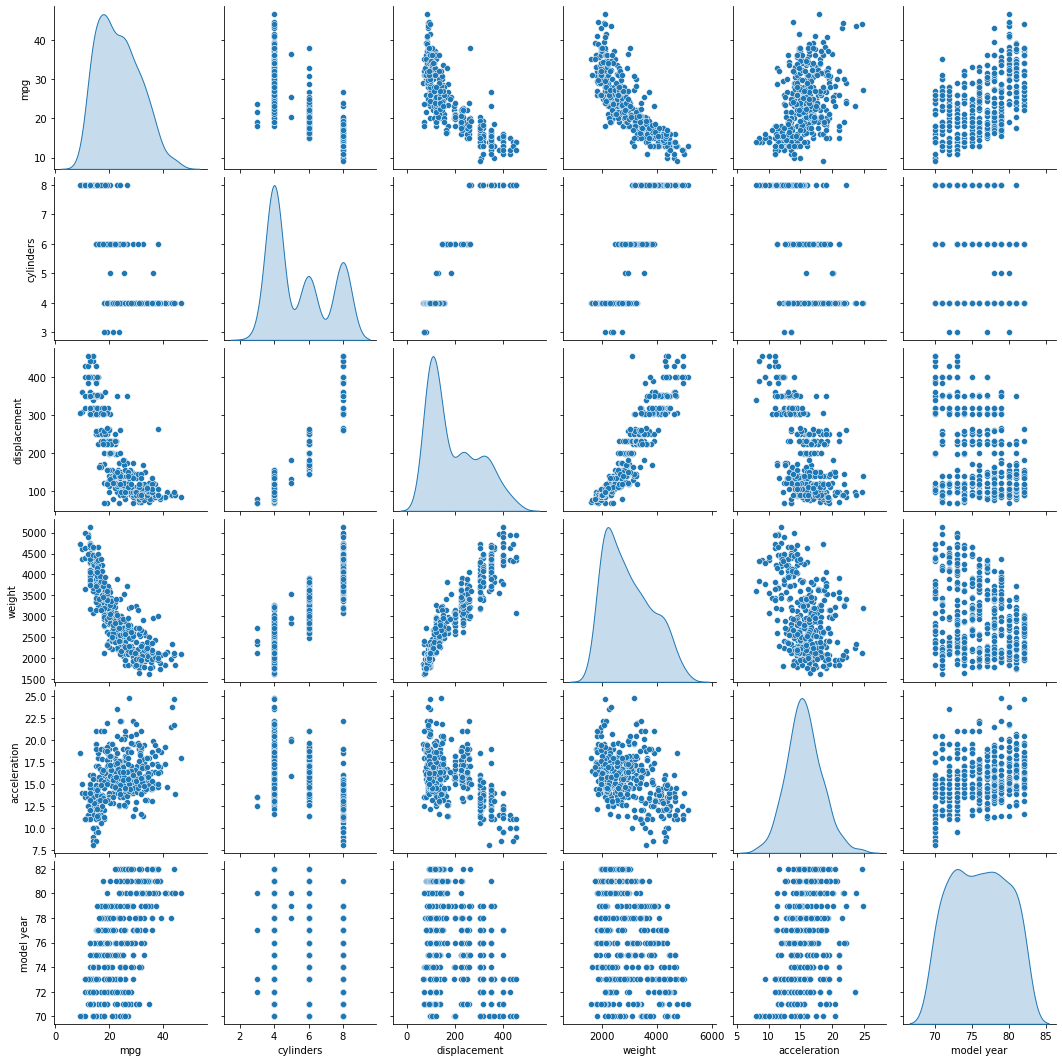

In [6]:
sns.pairplot(df,diag_kind='kde')

In [7]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america


In [8]:
dummies=pd.get_dummies(df[['origin']],
                       columns=['origin'],
                       drop_first=True)

In [9]:
df=pd.concat([df,dummies],axis=1)

In [10]:
columns=['origin']
df.drop(columns,axis=1,inplace=True)

In [11]:
df['horsepower']=df['horsepower'].replace(to_replace='?',value=np.nan)
df['horsepower']=df['horsepower'].astype(float)


In [12]:
median=df["horsepower"].median()


In [13]:
df["horsepower"].replace(np.nan,median,inplace=True)


In [14]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,0,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mpg            398 non-null    float64
 1   cylinders      398 non-null    int64  
 2   displacement   398 non-null    float64
 3   horsepower     398 non-null    float64
 4   weight         398 non-null    int64  
 5   acceleration   398 non-null    float64
 6   model year     398 non-null    int64  
 7   origin_asia    398 non-null    uint8  
 8   origin_europe  398 non-null    uint8  
dtypes: float64(4), int64(3), uint8(2)
memory usage: 22.7 KB


In [16]:
x=df.drop(['mpg'],axis=1)
y=df[['mpg']]

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [18]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [19]:
reg.score(x_train,y_train)

0.8141025501610559

In [20]:
reg.score(x_test,y_test)

0.843313513280883

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly=PolynomialFeatures(degree=3,interaction_only=True)
x_train2=poly.fit_transform(x_train)
x_test2=poly.fit_transform(x_train)
poly_clf=linear_model.LinearRegression()
poly_clf.fit(x_train2,y_train)
y_pred=poly_clf.predict(x_test2)


In [22]:
print(poly_clf.score(x_train2,y_train))

0.935370054618701


In [23]:
print(poly_clf.score(x_test2,y_test))

ValueError: Found input variables with inconsistent numbers of samples: [120, 278]